# Modeling the Difference Between Measures

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas as gpd

In [343]:
import statsmodels.formula.api as smf
import pandas as pd
import os
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import statsmodels.api as sm

In [6]:
import seaborn as sns

In [7]:
sns.set_context('paper')

In [8]:
sns.set_style('whitegrid')

In [422]:
df = gpd.read_parquet("../data/model_data.parquet")

In [352]:
df.columns

Index(['n', 'm', 'k_avg', 'edge_length_total', 'edge_length_avg',
       'streets_per_node_avg', 'intersection_count', 'street_length_total',
       'street_segment_count', 'street_length_avg', 'circuity_avg',
       'self_loop_proportion', 'node_density_km', 'intersection_density_km',
       'edge_density_km', 'street_density_km', 'node_props_dead_end',
       'node_props_3way', 'node_props_4way', 'name', 'planar_measure',
       'network_measure', 'seg_difference', 'p_value', 'ALAND', 'AWATER',
       'population', 'pop_density', 'geometry', 'cyclomatic', 'meshedness',
       'gamma', 'pct_diff', 'significant'],
      dtype='object')

In [423]:
df_transformed = pd.read_parquet("../data/scaled_features.parquet")

In [360]:
#df_transformed = df_transformed.join(df[['seg_difference', 'pct_diff']])

<AxesSubplot:>

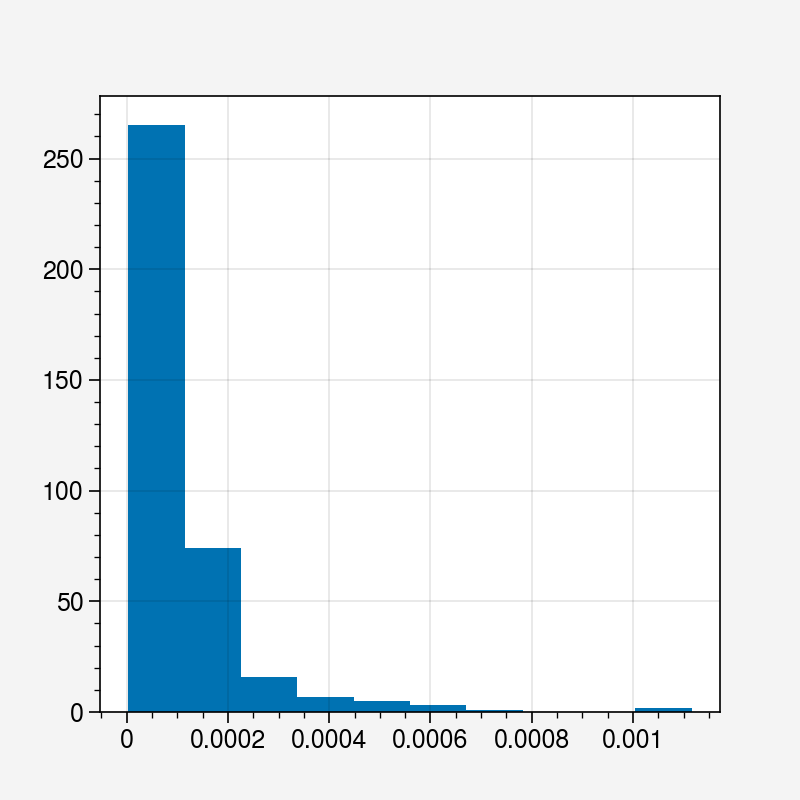

In [361]:
df.pop_density.hist()

<AxesSubplot:>

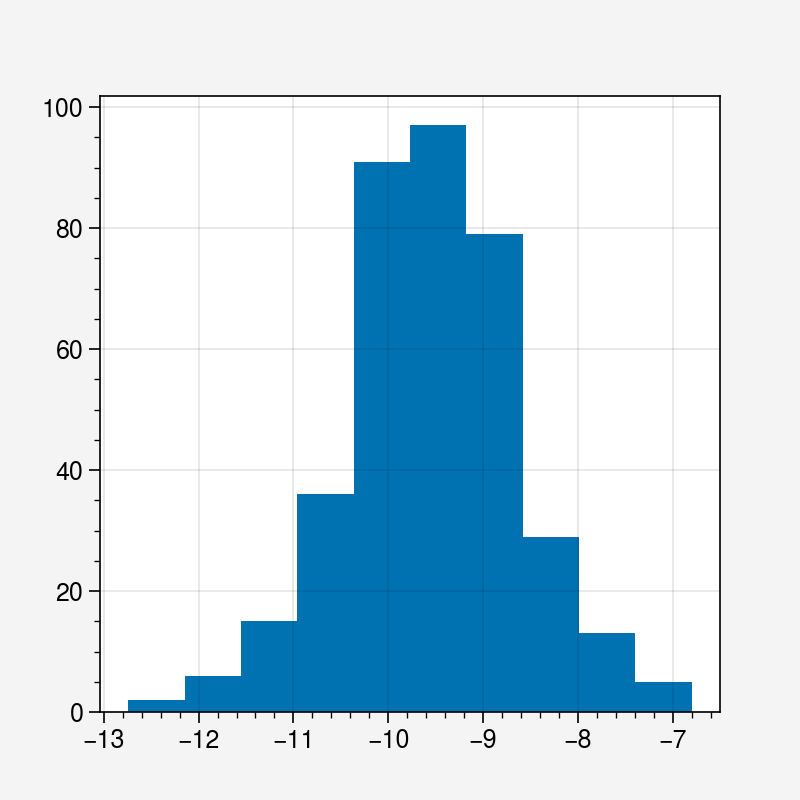

In [362]:
df_transformed.pop_density.hist()

In [363]:
df.columns

Index(['n', 'm', 'k_avg', 'edge_length_total', 'edge_length_avg',
       'streets_per_node_avg', 'intersection_count', 'street_length_total',
       'street_segment_count', 'street_length_avg', 'circuity_avg',
       'self_loop_proportion', 'node_density_km', 'intersection_density_km',
       'edge_density_km', 'street_density_km', 'node_props_dead_end',
       'node_props_3way', 'node_props_4way', 'name', 'planar_measure',
       'network_measure', 'seg_difference', 'p_value', 'ALAND', 'AWATER',
       'population', 'pop_density', 'geometry', 'cyclomatic', 'meshedness',
       'gamma', 'pct_diff', 'significant'],
      dtype='object')

In [60]:
features = [
    "k_avg",
    "streets_per_node_avg",
    "street_length_total",
    "street_segment_count",
    "street_length_avg",
    "street_density_km",
    "circuity_avg",
    "intersection_count",
    "intersection_density_km",
    "self_loop_proportion",
    "node_props_dead_end",
    "node_props_3way",
    "node_props_4way",
    "cyclomatic",
    "gamma",
    "meshedness",
    "ALAND",
    "AWATER",
    'population',
    'pop_density'
]

In [61]:
df[features].corr()

,k_avg,streets_per_node_avg,street_length_total,street_segment_count,street_length_avg,street_density_km,circuity_avg,intersection_count,intersection_density_km,self_loop_proportion,node_props_dead_end,node_props_3way,node_props_4way,cyclomatic,gamma,meshedness,ALAND,AWATER,population,pop_density
k_avg,1.000000,0.999800,0.174812,0.184314,-0.049380,-0.003012,-0.368338,0.185910,0.117747,-0.496090,-0.965407,-0.215885,0.907692,0.196907,1.000000,1.000000,0.193158,0.128444,0.159828,0.107143
streets_per_node_avg,0.999800,1.000000,0.165541,0.174938,-0.037853,-0.009874,-0.372653,0.176556,0.109148,-0.496226,-0.965541,-0.216365,0.908234,0.187611,0.999813,0.999813,0.187172,0.121251,0.152081,0.098427
street_length_total,0.174812,0.165541,1.000000,0.965856,-0.252969,0.428127,0.051288,0.966689,0.471649,-0.123753,-0.183776,0.060872,0.103409,0.963784,0.174341,0.174353,0.583029,0.327529,0.889691,0.560839
street_segment_count,0.184314,0.174938,0.965856,1.000000,-0.372365,0.538575,0.021800,0.999880,0.597573,-0.089669,-0.181242,0.015347,0.130551,0.999664,0.183874,0.183884,0.430593,0.378269,0.932411,0.680899
street_length_avg,-0.049380,-0.037853,-0.252969,-0.372365,1.000000,-0.612396,0.107107,-0.370711,-0.650920,-0.246570,0.010803,0.097402,-0.066819,-0.369280,-0.048878,-0.048893,0.131304,-0.208541,-0.293882,-0.505590
street_density_km,-0.003012,-0.009874,0.428127,0.538575,-0.612396,1.000000,0.014194,0.536922,0.958576,0.170700,0.003426,0.028172,-0.022538,0.535023,-0.003406,-0.003394,-0.161612,0.022123,0.470328,0.743105
circuity_avg,-0.368338,-0.372653,0.051288,0.021800,0.107107,0.014194,1.000000,0.020912,-0.004951,0.014364,0.380698,0.006080,-0.309755,0.018040,-0.368439,-0.368437,0.086558,-0.035918,0.015371,0.005844
intersection_count,0.185910,0.176556,0.966689,0.999880,-0.370711,0.536922,0.020912,1.000000,0.595475,-0.089759,-0.184748,0.022303,0.128883,0.999642,0.185471,0.185482,0.432105,0.378242,0.933299,0.680473
intersection_density_km,0.117747,0.109148,0.471649,0.597573,-0.650920,0.958576,-0.004951,0.595475,1.000000,0.106725,-0.097285,-0.049583,0.106804,0.596022,0.117323,0.117335,-0.074657,0.147954,0.519900,0.800373
self_loop_proportion,-0.496090,-0.496226,-0.123753,-0.089669,-0.246570,0.170700,0.014364,-0.089759,0.106725,1.000000,0.438354,0.259107,-0.514333,-0.096416,-0.496207,-0.496201,-0.260122,-0.057133,-0.107736,0.019549


In [286]:
log_features = [
    'network_measure',
    'planar_measure',
    "streets_per_node_avg",
    "street_length_total",
    "street_segment_count",
    "street_length_avg",
    "street_density_km",
    "circuity_avg",
    "intersection_count",
    "intersection_density_km",
    "self_loop_proportion",
    "node_props_4way",
    "cyclomatic",
    "ALAND",
    "AWATER",
    'population',
    'pop_density',

]

In [287]:
logmap = dict(zip(log_features, [np.log for i in range(len(log_features))]))

In [289]:
# these variables are normal, so convert to Z. Others get logged in the formula

z_features = [
    "self_loop_proportion",
    "node_props_dead_end",
    "node_props_3way",
    "meshedness",
    "k_avg",
    "gamma",
    "seg_difference",
    "pct_diff"

]

In [198]:
from scipy.stats import zscore

In [290]:
zmap = dict(zip(z_features, [zscore for i in range(len(z_features))]))

In [291]:
mapper = {**logmap, **zmap}

In [292]:
mapper

{'network_measure': <ufunc 'log'>,
 'planar_measure': <ufunc 'log'>,
 'streets_per_node_avg': <ufunc 'log'>,
 'street_length_total': <ufunc 'log'>,
 'street_segment_count': <ufunc 'log'>,
 'street_length_avg': <ufunc 'log'>,
 'street_density_km': <ufunc 'log'>,
 'circuity_avg': <ufunc 'log'>,
 'intersection_count': <ufunc 'log'>,
 'intersection_density_km': <ufunc 'log'>,
 'self_loop_proportion': <function scipy.stats._stats_py.zscore(a, axis=0, ddof=0, nan_policy='propagate')>,
 'node_props_4way': <ufunc 'log'>,
 'cyclomatic': <ufunc 'log'>,
 'ALAND': <ufunc 'log'>,
 'AWATER': <ufunc 'log'>,
 'population': <ufunc 'log'>,
 'pop_density': <ufunc 'log'>,
 'node_props_dead_end': <function scipy.stats._stats_py.zscore(a, axis=0, ddof=0, nan_policy='propagate')>,
 'node_props_3way': <function scipy.stats._stats_py.zscore(a, axis=0, ddof=0, nan_policy='propagate')>,
 'meshedness': <function scipy.stats._stats_py.zscore(a, axis=0, ddof=0, nan_policy='propagate')>,
 'k_avg': <function scipy.st

In [199]:
df[z_features]

,self_loop_proportion,node_props_dead_end,node_props_3way,meshedness
fips,,,,
20020,0.009952,0.231098,0.657460,0.822488
29180,0.006060,0.226056,0.628956,0.846350
30980,0.010893,0.235871,0.677048,0.805819
39820,0.012121,0.274638,0.621067,0.776530
17140,0.009675,0.264283,0.605788,0.802307
...,...,...,...,...
25060,0.009396,0.254782,0.645746,0.795166
22380,0.007045,0.212994,0.653043,0.852795
48260,0.010269,0.296751,0.603574,0.750100


In [200]:
df[z_features] = df[z_features].apply(zscore)

In [206]:
df[z_features].describe().round(3)

,self_loop_proportion,node_props_dead_end,node_props_3way,meshedness
count,369.000,369.000,369.000,369.000
mean,-0.013,-0.011,-0.005,0.012
std,0.994,0.996,1.000,0.997
min,-1.869,-2.304,-3.881,-2.526
25%,-0.688,-0.760,-0.556,-0.737
50%,-0.145,-0.046,0.044,0.021
75%,0.520,0.687,0.731,0.706
max,4.269,2.729,2.415,2.776


In [340]:
df = df[df.seg_difference>0]

In [341]:
df.seg_difference.sort_values()

fips
15260    0.001325
24140    0.003418
45540    0.003566
25980    0.005687
33740    0.006079
           ...   
31140    0.059522
34620    0.059847
34060    0.059895
37900    0.062859
16620    0.076762
Name: seg_difference, Length: 369, dtype: float64

In [211]:
df.describe()

,n,m,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,intersection_count,street_length_total,street_segment_count,street_length_avg,...,p_value,ALAND,AWATER,population,pop_density,cyclomatic,meshedness,gamma,pct_diff,significant
count,3.690000e+02,3.690000e+02,369.000000,3.690000e+02,369.000000,369.000000,3.690000e+02,3.690000e+02,3.690000e+02,369.000000,...,369.000000,3.690000e+02,3.690000e+02,3.690000e+02,369.000000,3.690000e+02,369.000000,369.000000,369.000000,369.000000
mean,9.424172e+04,2.560939e+05,5.362139,3.140905e+07,174.542237,2.685147,7.345009e+04,1.570453e+07,1.280469e+05,174.542283,...,0.239409,6.633886e+09,5.300382e+08,7.225553e+05,0.000110,1.618532e+05,0.012429,0.893744,20.068365,0.249322
std,1.548870e+05,4.315368e+05,0.280626,3.831399e+07,82.702477,0.140532,1.242553e+05,1.915700e+07,2.157684e+05,82.702449,...,0.226631,7.577528e+09,1.126786e+09,1.644004e+06,0.000129,2.769094e+05,0.997288,0.046771,10.974303,0.433208
min,6.894000e+03,1.918600e+04,4.648007,3.974152e+06,64.948387,2.326305,5.556000e+03,1.987076e+06,9.593000e+03,64.948387,...,0.000000,3.743414e+08,1.547615e+06,5.453200e+04,0.000003,1.229300e+04,-2.526237,0.774682,0.464367,0.000000
25%,2.235900e+04,5.859400e+04,5.151005,1.168721e+07,115.922539,2.582284,1.675300e+04,5.843604e+06,2.929700e+04,115.922539,...,0.053000,2.331502e+09,3.502297e+07,1.440370e+05,0.000041,3.594100e+04,-0.737440,0.858577,12.074869,0.000000
50%,4.252900e+04,1.124100e+05,5.364774,1.843896e+07,151.749568,2.685538,3.172100e+04,9.219478e+06,5.620500e+04,151.749568,...,0.186800,4.431945e+09,1.089686e+08,2.499220e+05,0.000072,6.937600e+04,0.020816,0.894135,18.494811,0.000000
75%,8.955700e+04,2.378580e+05,5.557589,3.290646e+07,213.038949,2.781253,6.694200e+04,1.645321e+07,1.189290e+05,213.038949,...,0.338600,8.292632e+09,4.360582e+08,5.707840e+05,0.000129,1.442800e+05,0.706001,0.926270,26.090514,0.000000
max,1.290221e+06,3.644396e+06,6.139459,2.939655e+08,643.348427,3.074904,1.044529e+06,1.469827e+08,1.822197e+06,643.348427,...,0.971200,7.064805e+10,1.208540e+10,1.932261e+07,0.001116,2.354176e+06,2.776480,1.023372,69.350566,1.000000


## $\Delta_{\tilde{H}}$

In [342]:
form_diff = (
    "seg_difference ~ 1 + np.log(planar_measure) + np.log(street_length_total) + np.log(street_length_avg) +"
    "np.log(intersection_density_km) + np.log(self_loop_proportion) +  np.log(circuity_avg) + node_props_dead_end + node_props_3way +I(node_props_3way**2)+ np.log(node_props_4way) + np.log(cyclomatic) + np.log(meshedness)  +"
    "np.log(population) + np.log(pop_density) + np.log(ALAND) + np.log(AWATER)"
)

In [539]:
form_diff_pure = (
    "seg_difference ~ 1 + planar_measure +"
    "circuity_avg+intersection_density_km+self_loop_proportion+cyclomatic+meshedness+ALAND+"
    "circuity_avg*cyclomatic + meshedness*cyclomatic +cyclomatic*intersection_density_km + intersection_density_km*circuity_avg"
)

In [528]:
form_diff_pure_reduced = (
    "seg_difference ~ 1 + planar_measure +"
    "circuity_avg+intersection_density_km+self_loop_proportion+cyclomatic+meshedness+ALAND"
)

In [540]:
model_diff = smf.ols(form_diff_pure, df).fit()

In [541]:
model_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         seg_difference   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     3.048
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           0.000644
Time:                        16:13:53   Log-Likelihood:                 1120.6
No. Observations:                 373   AIC:                            -2217.
Df Residuals:                     361   BIC:                            -2170.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -0.0225      0.036     -0.629      0.530      -0.093       0.048
planar_measure                          -0.0060      0.010     -0.634      0.527      -0.025       0.013
circuity_avg                             0.0402      0.026      1.543      0.124      -0.011       0.091
intersection_density_km                  0.0070      0.004      1.716      0.087      -0.001       0.015
self_loop_proportion                    -0.4014      0.194     -2.069      0.039      -0.783      -0.020
cyclomatic                            5.079e-07   2.48e-07      2.047      0.041    1.99e-08    9.96e-07
meshedness                               0.0104      0.014      0.746      0.456      -0.017       0.038
ALAND                                -2.092e-14   1.18e-13     -0.177      0.859   -2.53e-13    2.11e-13
circuity_avg:cyclomatic              -3.661e-07   2.07e-07     -1.767      0.078   -7.74e-07    4.13e-08
meshedness:cyclomatic                -1.108e-07    5.1e-08     -2.172      0.030   -2.11e-07   -1.05e-08
cyclomatic:intersection_density_km    -3.12e-10   2.25e-10     -1.385      0.167   -7.55e-10    1.31e-10
intersection_density_km:circuity_avg    -0.0060      0.004     -1.638      0.102      -0.013       0.001
==============================================================================
Omnibus:                       57.553   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              318.543
Skew:                          -0.475   Prob(JB):                     6.75e-70
Kurtosis:                       7.426   Cond. No.                     3.09e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [465]:
model_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         seg_difference   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     3.137
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           7.75e-05
Time:                        15:12:01   Log-Likelihood:                -500.00
No. Observations:                 369   AIC:                             1032.
Df Residuals:                     353   BIC:                             1095.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                98.8606     35.025      2.823      0.005      29.977     167.744
planar_measure                            0.1522      0.137      1.111      0.268      -0.117       0.422
street_length_total                     117.9166     44.758      2.635      0.009      29.891     205.943
street_length_avg                        -9.4286     43.936     -0.215      0.830     -95.838      76.980
street_density_km                      -109.2593     47.868     -2.283      0.023    -203.401     -15.118
circuity_avg                             36.7662     41.553      0.885      0.377     -44.957     118.489
intersection_density_km                 108.8671     47.829      2.276      0.023      14.800     202.934
self_loop_proportion                     -0.0049      0.075     -0.065      0.948      -0.153       0.143
node_props_3way                          -1.2604      0.668     -1.886      0.060      -2.575       0.054
node_props_4way                           3.8769      1.184      3.274      0.001       1.548       6.206
cyclomatic                             -117.5227     44.751     -2.626      0.009    -205.534     -29.511
meshedness                                1.3867      0.928      1.494      0.136      -0.438       3.212
ALAND                                    -0.0487      0.294     -0.165      0.869      -0.627       0.530
AWATER                                   -0.0791      0.049     -1.604      0.110      -0.176       0.018
population                                0.0168      0.202      0.083      0.934      -0.381       0.415
pop_density                               0.0655      0.149      0.438      0.661      -0.228       0.359
I(circuity_avg * street_length_total)    -2.3786      2.590     -0.918      0.359      -7.472       2.715
==============================================================================
Omnibus:                        4.261   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                4.237
Skew:                           0.180   Prob(JB):                        0.120
Kurtosis:                       3.383   Cond. No.                     5.31e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.08e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [485]:
from seg_networks import Linear_Reg_Diagnostic

In [523]:
diag_plots_diff = Linear_Reg_Diagnostic(model_pure.fit())

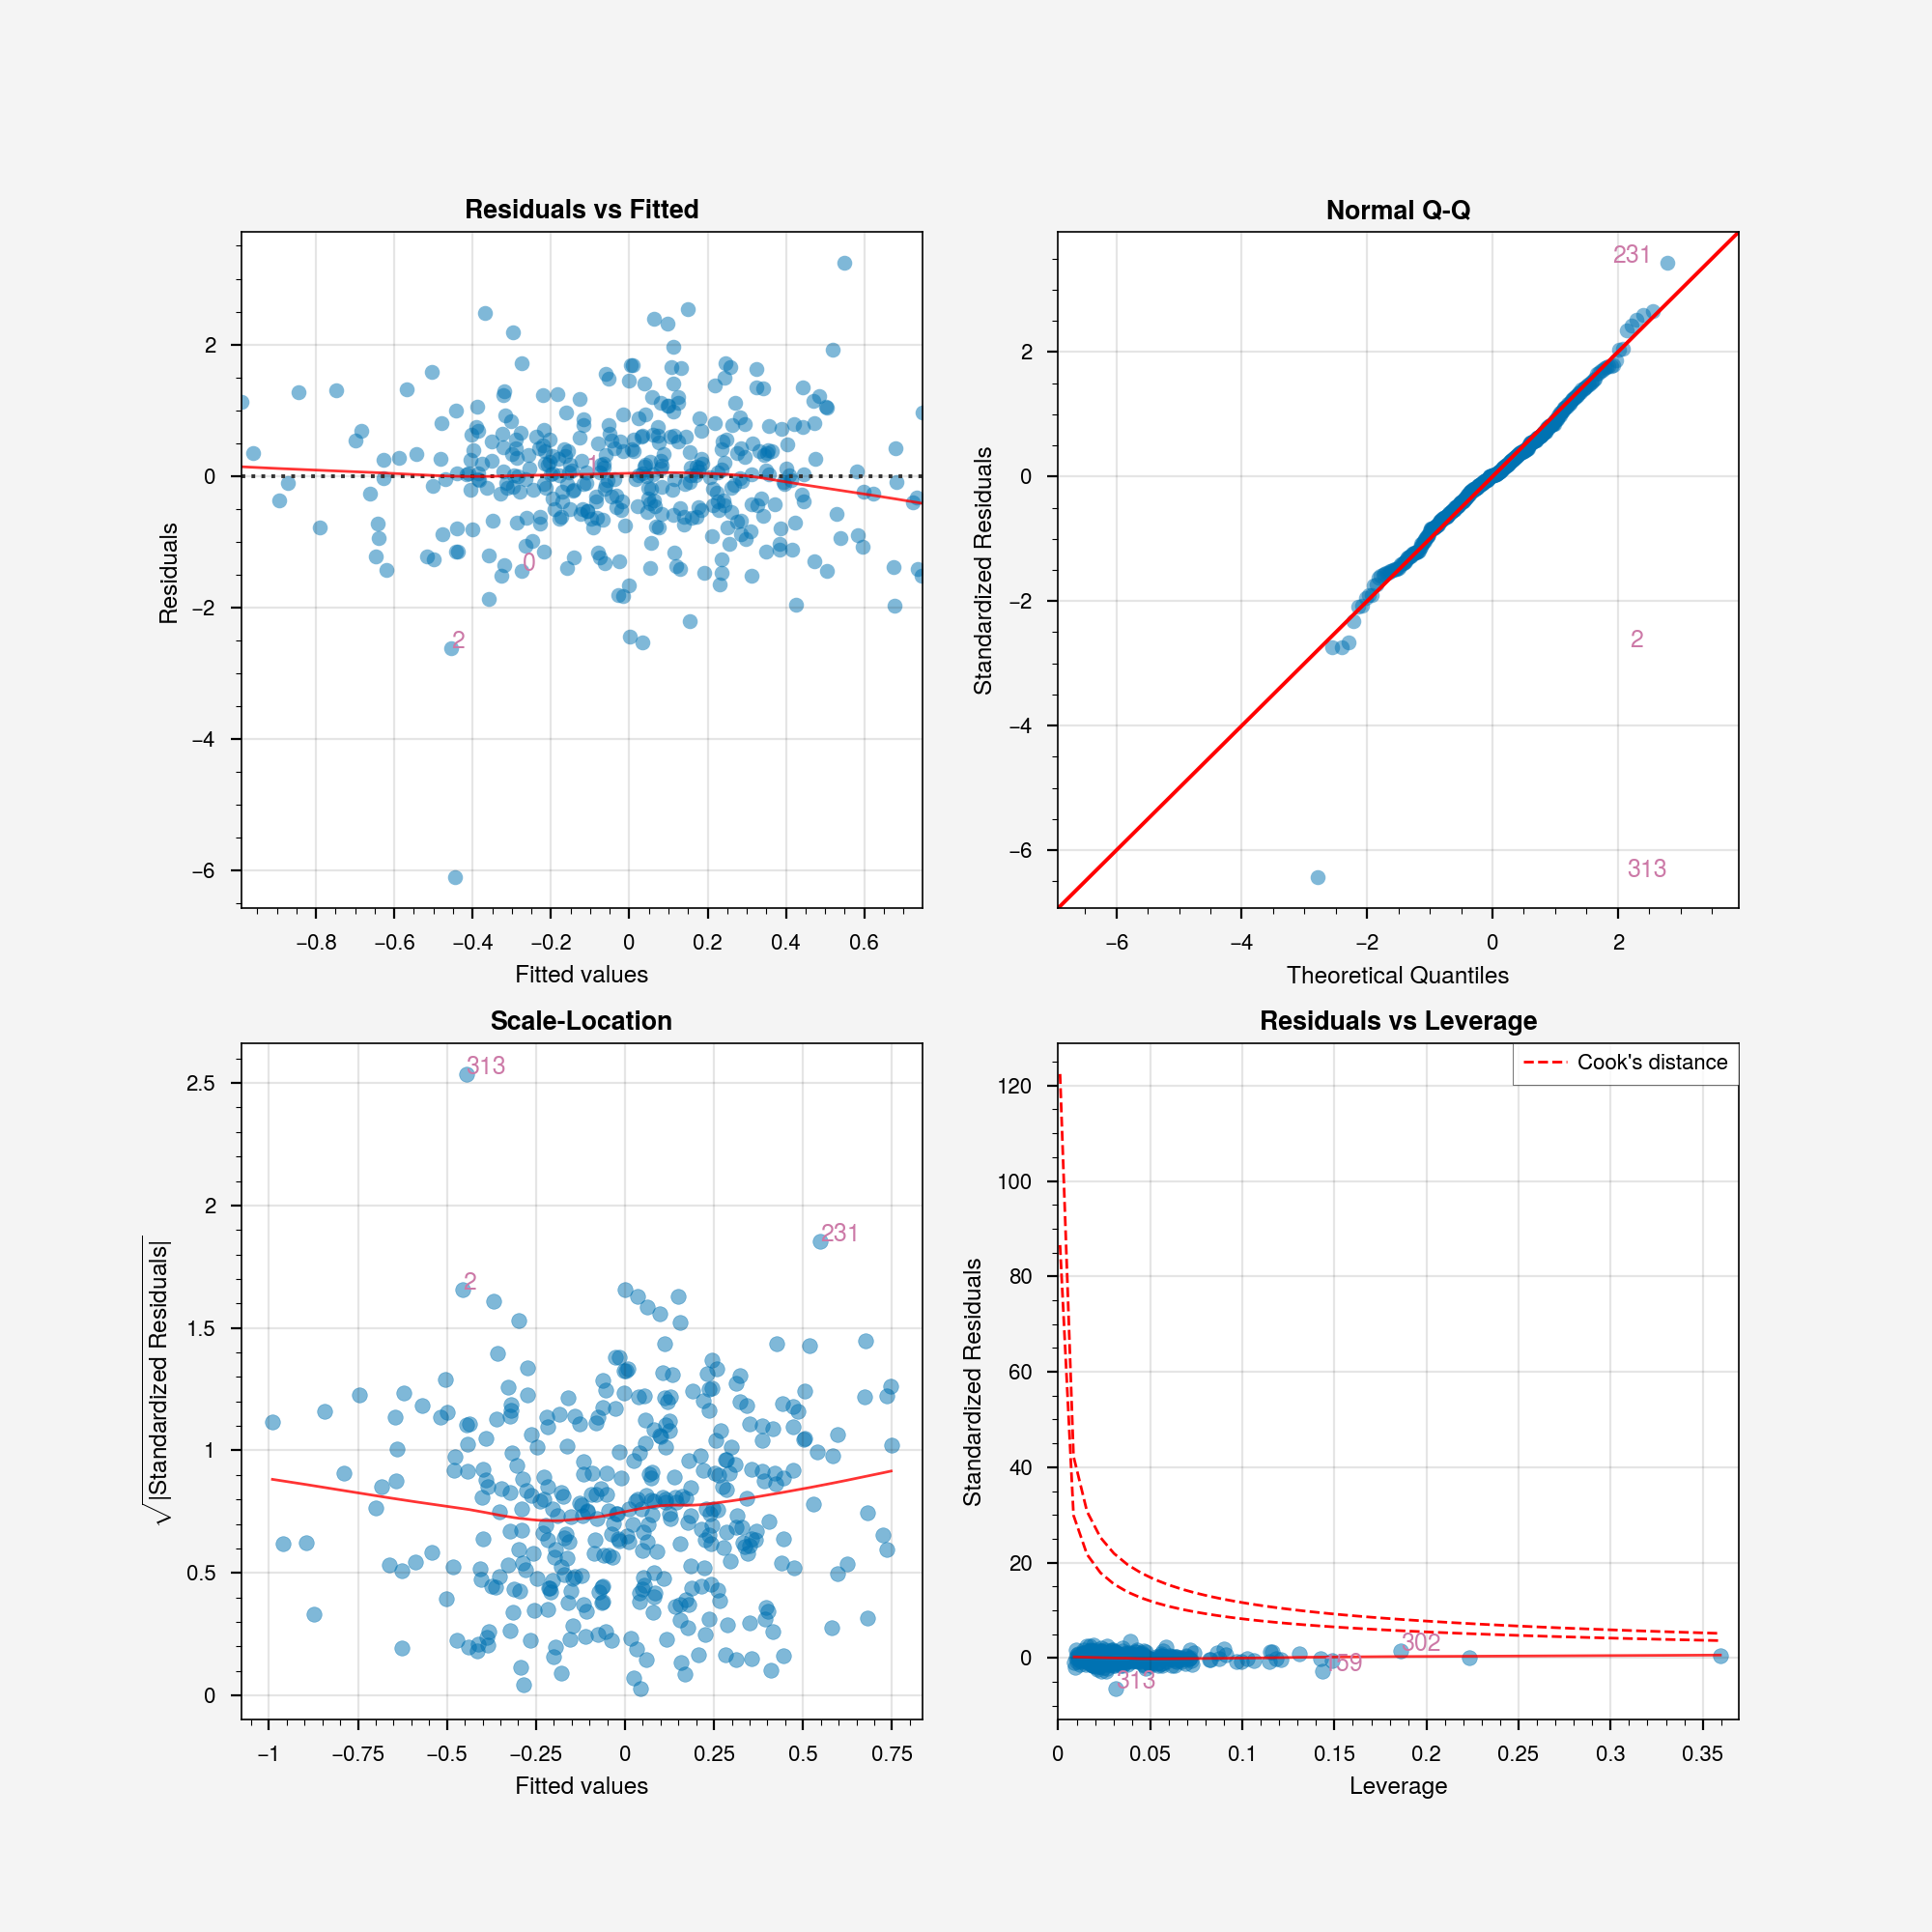

(<Figure size 1000x1000 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [524]:
diag_plots_diff()

## $\Delta_{pct}$

In [171]:
form_pct = (
    "pct_diff ~ 1 + np.log(planar_measure) + np.log(street_length_total) + np.log(street_length_avg) +"
    "np.log(intersection_density_km) + np.log(self_loop_proportion) +  np.log(circuity_avg) + node_props_dead_end + node_props_3way + np.log(node_props_4way) + np.log(cyclomatic) + meshedness  +"
    "np.log(population) + np.log(pop_density) + np.log(ALAND) + np.log(AWATER)"
)

In [419]:
form_pct_pure = (
    "pct_diff ~ 1 + planar_measure + street_length_total + street_length_avg + street_density_km +"
    "intersection_density_km + self_loop_proportion +  circuity_avg  + node_props_3way  + node_props_4way + cyclomatic + meshedness +"
    "population + pop_density + ALAND + AWATER + I(circuity_avg*cyclomatic) + I(meshedness*cyclomatic)"
)

In [428]:
model_pct = smf.ols(form_pct_pure, df_transformed).fit()

In [429]:
model_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pct_diff   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     27.19
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           6.20e-52
Time:                        11:06:04   Log-Likelihood:                -226.82
No. Observations:                 369   AIC:                             487.6
Df Residuals:                     352   BIC:                             554.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       61.7083     16.856      3.661      0.000      28.558      94.859
planar_measure                  -1.0262      0.066    -15.638      0.000      -1.155      -0.897
street_length_total             78.4411     21.706      3.614      0.000      35.752     121.130
street_length_avg               -9.3445     21.099     -0.443      0.658     -50.841      32.152
street_density_km              -69.6278     22.789     -3.055      0.002    -114.448     -24.807
intersection_density_km         69.3694     22.772      3.046      0.002      24.584     114.155
self_loop_proportion             0.0019      0.036      0.052      0.959      -0.069       0.073
circuity_avg                    32.7355     10.521      3.111      0.002      12.043      53.428
node_props_3way                 -0.8120      0.318     -2.550      0.011      -1.438      -0.186
node_props_4way                  2.1649      0.567      3.819      0.000       1.050       3.280
cyclomatic                     -78.0631     21.711     -3.595      0.000    -120.764     -35.363
meshedness                       2.3024      0.592      3.887      0.000       1.137       3.467
population                       0.0762      0.098      0.779      0.437      -0.116       0.269
pop_density                      0.0881      0.072      1.232      0.219      -0.053       0.229
ALAND                           -0.0120      0.141     -0.085      0.933      -0.290       0.266
AWATER                          -0.0413      0.024     -1.745      0.082      -0.088       0.005
I(circuity_avg * cyclomatic)    -2.9792      0.962     -3.098      0.002      -4.871      -1.088
I(meshedness * cyclomatic)      -0.1051      0.027     -3.917      0.000      -0.158      -0.052
==============================================================================
Omnibus:                      124.747   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              473.053
Skew:                          -1.459   Prob(JB):                    1.90e-103
Kurtosis:                       7.718   Cond. No.                     5.27e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [426]:
diag_plots_pct = Linear_Reg_Diagnostic(model_pct)

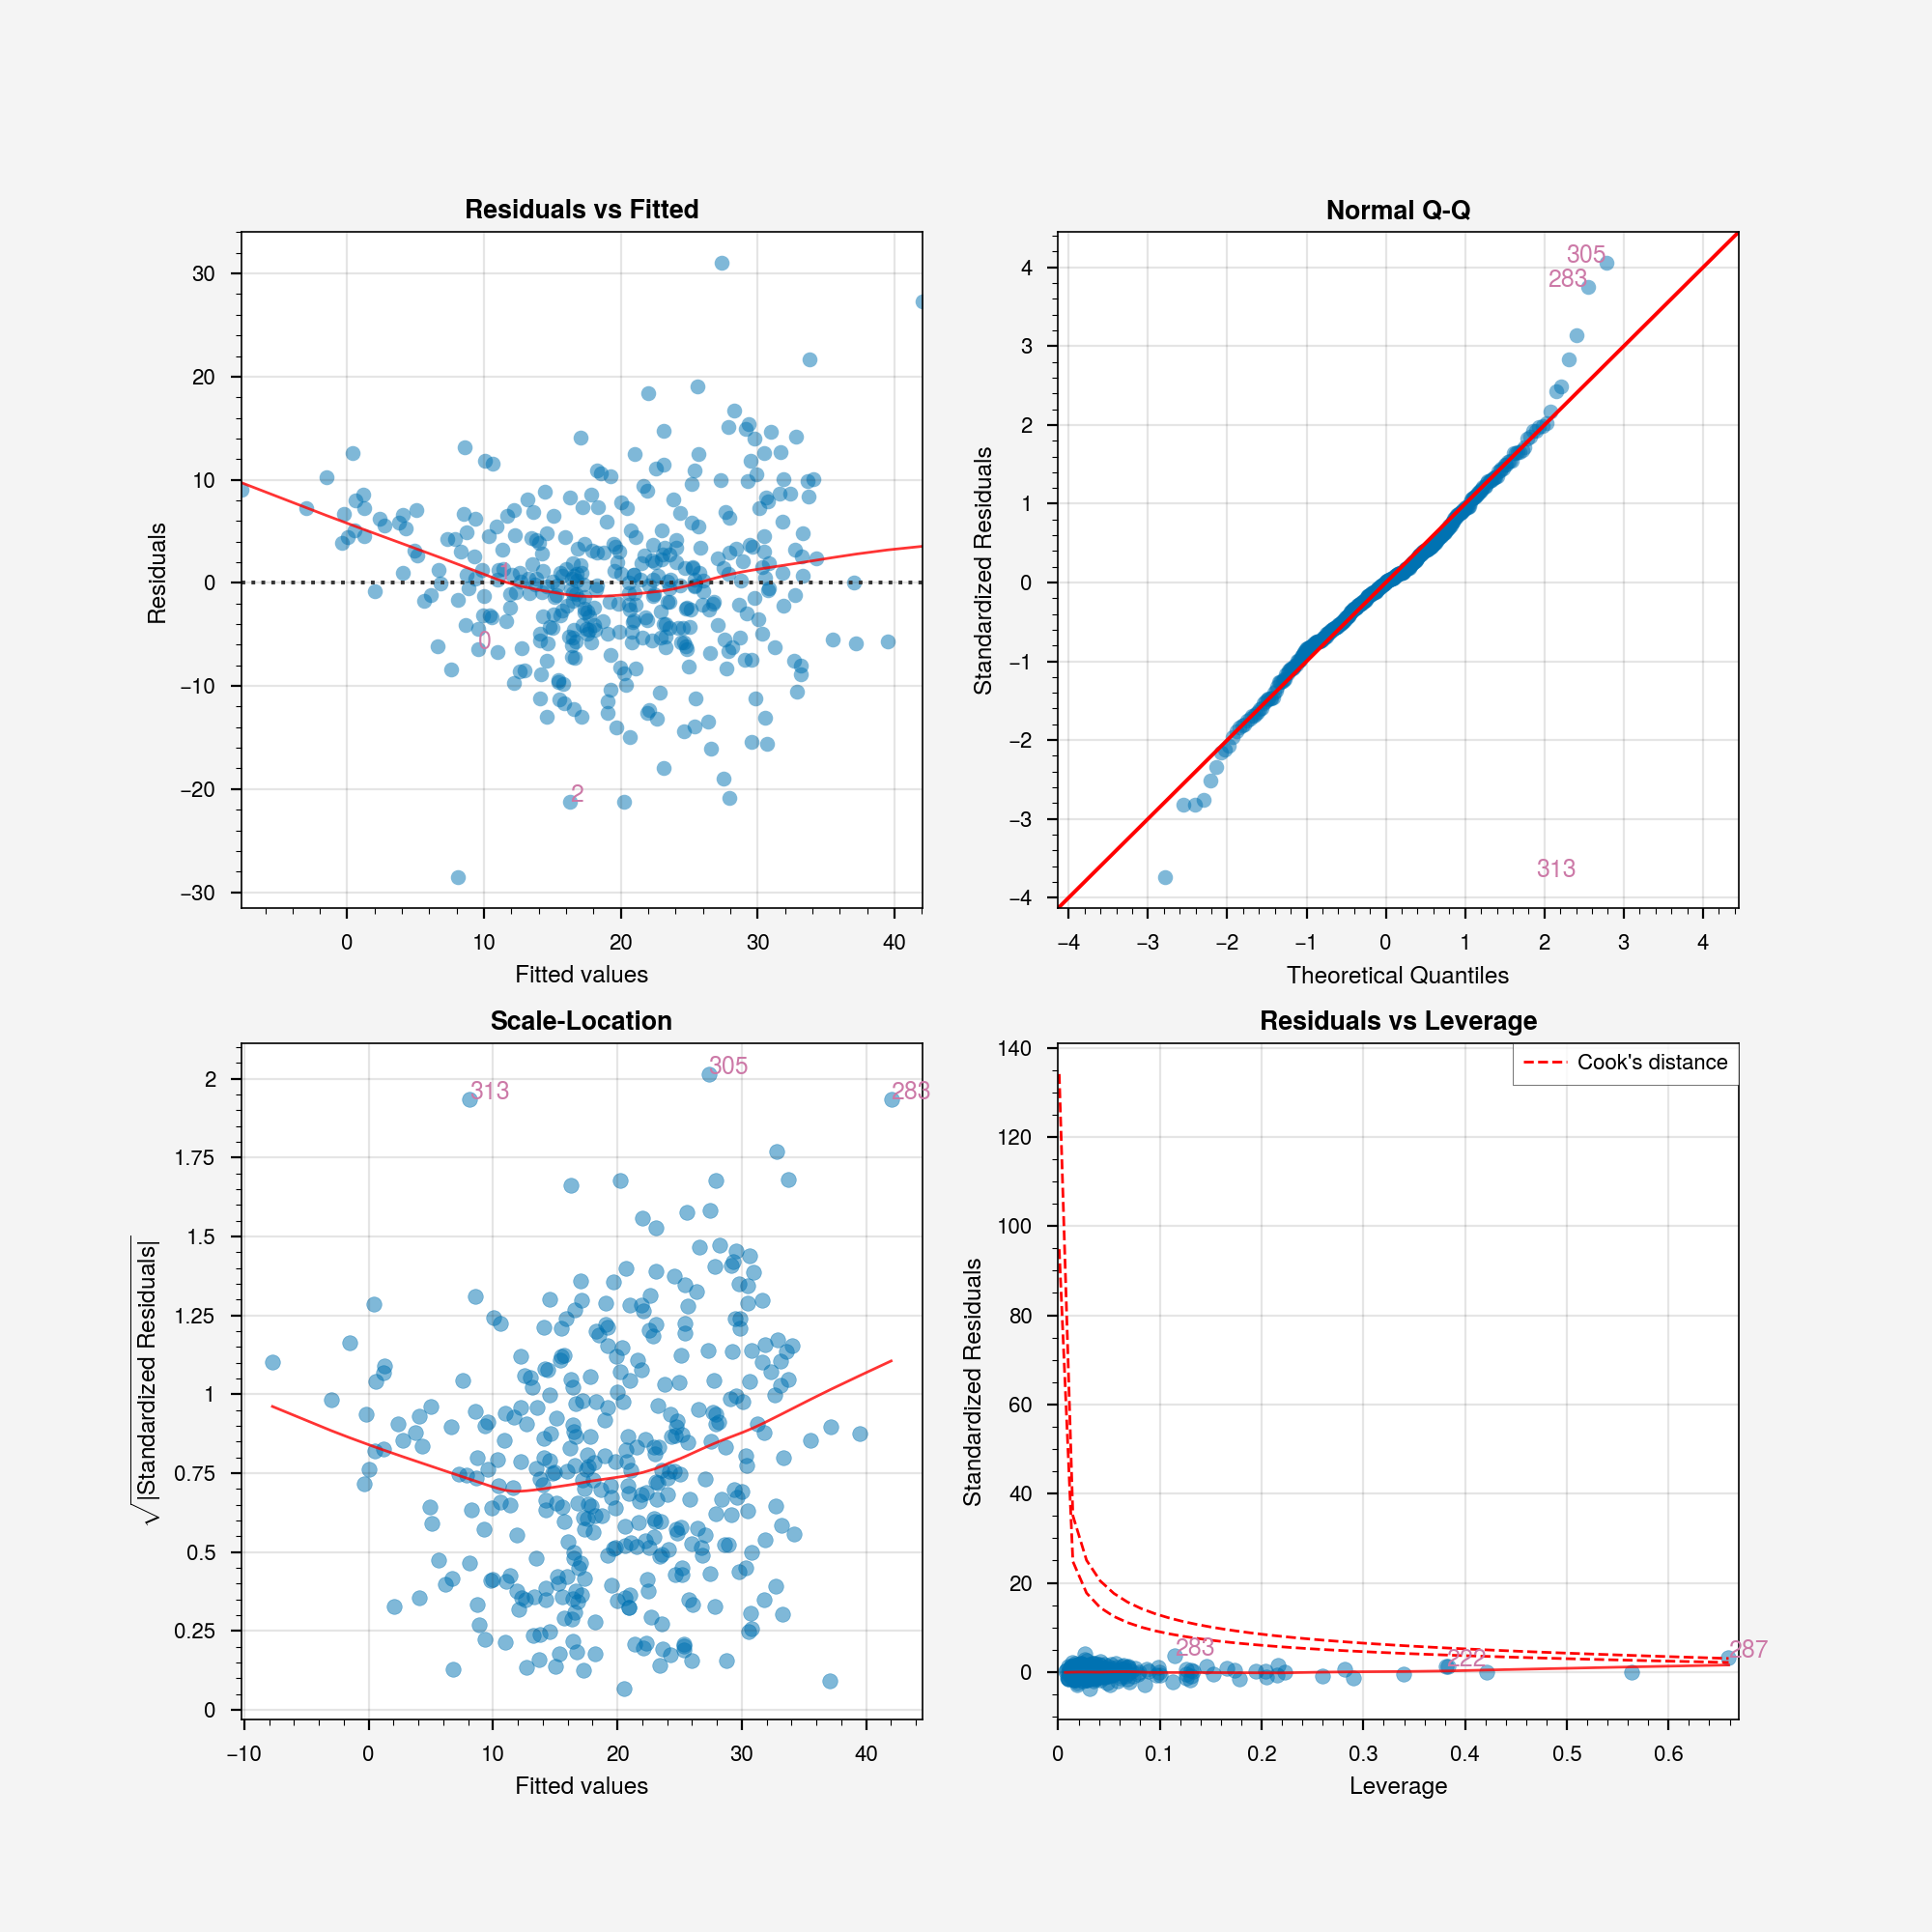

(<Figure size 1000x1000 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [427]:
diag_plots_pct()

## Results to table

In [35]:
# pull out variable names and escape for latex
names = model_diff.params.index.str.replace('_', '\_').tolist()

In [36]:
names = [name.replace('np.', '') for name in names]

In [37]:
print(names[1])

planar\_measure


In [38]:
renamer = dict(zip(model_diff.params.index.tolist(), names))

In [39]:
print(renamer)

{'Intercept': 'Intercept', 'planar_measure': 'planar\\_measure', 'np.log(street_length_total)': 'log(street\\_length\\_total)', 'np.log(street_length_avg)': 'log(street\\_length\\_avg)', 'np.log(street_density_km)': 'log(street\\_density\\_km)', 'np.log(intersection_density_km)': 'log(intersection\\_density\\_km)', 'self_loop_proportion': 'self\\_loop\\_proportion', 'circuity_avg': 'circuity\\_avg', 'node_props_dead_end': 'node\\_props\\_dead\\_end', 'node_props_3way': 'node\\_props\\_3way', 'node_props_4way': 'node\\_props\\_4way', 'np.log(cyclomatic)': 'log(cyclomatic)', 'meshedness': 'meshedness', 'np.log(population)': 'log(population)', 'np.log(pop_density)': 'log(pop\\_density)', 'np.log(ALAND)': 'log(ALAND)', 'np.log(AWATER)': 'log(AWATER)'}


In [40]:
from stargazer.stargazer import Stargazer

In [41]:
results_table = Stargazer([model_diff, model_pct])
results_table.title('Segregation Difference')
results_table.custom_columns([r'$\Delta_{\tilde{H}}$', r'$\Delta_{pct}$'], [1, 1])
results_table.show_confidence_intervals(True)
results_table.rename_covariates(renamer)

In [42]:
# redirect print to write the stargazer table to file

import sys
original_stdout = sys.stdout # Save a reference to the original standard output

with open("../paper/tables/regression.md", 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(results_table.render_latex())
    sys.stdout = original_stdout # Reset the standard output to its original value
